In [1]:
using CSV, DataFrames
using FileIO, Dates



include("../region_cube_split/cubes.jl")

region_cube_split (generic function with 1 method)

### Load data and split into cubes

In [2]:
romania_full = CSV.read("../data/romania.csv", DataFrame);
romania = romania_full[romania_full.Datetime .> DateTime(1976,1,1,0,0,0),:];

vrancea = romania[(romania.Latitude .>= 45.20) .& (romania.Latitude .<= 46.0) .& 
                    (romania.Longitude .>= 26.0) .& (romania.Longitude .<= 27.0) .&
                    (romania.Depth .>= 50.0) .& (romania.Depth .<= 200.0), :];

In [3]:
vrancea, vrancea_cubes = region_cube_split(vrancea,side=5,energyRelease=true);

### Load motifs 

In [5]:
using DelimitedFiles

include("./motifs_analysis.jl")

volume_tetrahedrons (generic function with 1 method)

In [6]:
motif = "Triangle"
# motif = "Tetrahedron"

"Triangle"

In [7]:
filename= "./motifs" * motif * "_vrancea_5km.csv"
motifs = readdlm(filename, ',', Int64);
motifs;

In [8]:
motif_energy = total_mean_energy(motifs, vrancea, vrancea_cubes);
areas = area_triangles(motifs, vrancea_cubes);

In [10]:
area = [value for value in values(areas)];
totalenergy = [value[1] for value in values(motif_energy)]
meanenergy = [value[2] for value in values(motif_energy)];

## Imposing a limit for acceptables areas
### Then creating vectors for area weighted by total/mean energy

In [11]:
area_weight_totalenergy = []
area_weight_meanenergy = []
for key in keys(motif_energy)
    # Used to filter out zeros and very small areas (triangles on the vertical for example)
    if areas[key] > 1
        push!(area_weight_totalenergy, areas[key]/motif_energy[key][1])
        push!(area_weight_meanenergy, areas[key]/motif_energy[key][2])
    end
end

In [13]:
using CurveFit
using Plots; gr()

include("./histogram_fit.jl")

power_law (generic function with 1 method)

In [14]:
h, x,y = histogram_fit(area_weight_meanenergy)

(Histogram{Float64, 1, Tuple{StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64}}}
edges:
  1.401228664456385e-7:0.00349628389190202:0.7272271896384865
weights: [613.0, 320.0, 219.0, 155.0, 145.0, 100.0, 90.0, 78.0, 74.0, 37.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
closed: left
isdensity: false, Any[0.0017482820688174557, 0.005244565960719476, 0.008740849852621494, 0.012237133744523515, 0.015733417636425533, 0.019229701528327554, 0.022725985420229574, 0.026222269312131594, 0.029718553204033615, 0.03321483709593563  …  0.08915537936636796, 0.09265166325826998, 0.096147947150172, 0.09964423104207401, 0.10314051493397604, 0.10663679882587807, 0.11013308271778008, 0.11362936660968209, 0.1171256505015841, 0.12062193439348613], [0.7845478179087685, 0.40955187884307653, 0.2802870670832305, 0.1983766913146152, 0.18557819510076906, 0.12798496213846142, 0.11518646592461528, 0.0998282704679999, 0.09470887198246145, 0.04735443599123072  …  0.0166

## Plotting
### And Fitting with Least Squares

In [60]:
plot(h ; label="",xscale=:log10, xlim=extrema(area_weight_meanenergy))
savefig("../results/bins_example_iqr.png")

"d:\\projects\\seismic-networks-julia\\results\\bins_example_iqr.png"

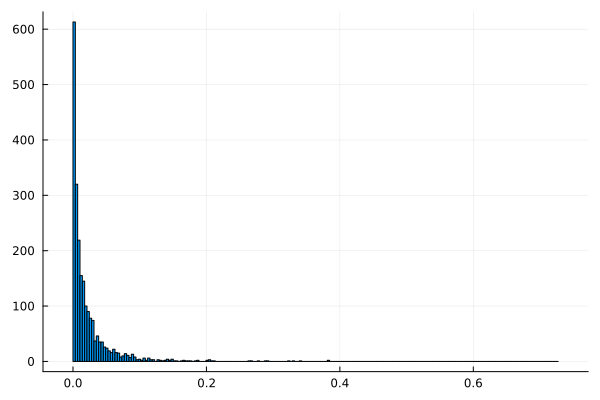

In [17]:
plot(h ; label="")#,xscale=:log10, xlim=extrema(area_weight_totalenergy))

In [59]:
scatter(x,y,xscale=:log10,yscale=:log10)
savefig("../results/bin_scatter.png")

"d:\\projects\\seismic-networks-julia\\results\\bin_scatter.png"

In [61]:
parameters = CurveFit.power_fit(x, y)

a = round(parameters[2],digits=4)
scatter(x, y,xscale=:log10,yscale=:log10)
plot!(x,power_law(x,parameters[1],parameters[2]))
annotate!(0.002,0.005,text("α= $a", :left, :bottom, 16))
savefig("../results/fit_example.png")


"d:\\projects\\seismic-networks-julia\\results\\fit_example.png"

(1.7829793182107762e-6, -1.53988119157843)

### Tetrahedron test .

In [ ]:

# # motif = "Triangle"
# motif = "Tetrahedron"
# filename= "./motifs" * motif * "_vrancea_5km.csv"
# motifs = readdlm(filename, ',', Int64);
# motifs;
# motif_energy = total_mean_energy(motifs, vrancea, vrancea_cubes)
# volumes = volume_tetrahedrons(motifs,vrancea_cubes)